## Intro:
#### In this report we'll be discussing the case of a simple or a collection of simple models combined in one model being a better estimator (more accurate model) than a more complix and heavy computational model, so in this case to figure this out I've got a dataset called [Acoustic Extinguisher Fire Dataset](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset) that is used in classifaction manners to perform different kinds of models on and see which is really better, the simple or the more complix ones.
#### So let's start with importing so initial libraries that will help as deal with data before modeling it (preprocessing)!

In [1]:
# Importing Data Analysis libraries:
import pandas as pd 
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Let's take a look at a sample of the data!

In [2]:
data = pd.read_excel('archive_4\Acoustic_Extinguisher_Fire_Dataset\Acoustic_Extinguisher_Fire_Dataset.xlsx')
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


### Some information about the dataset would be great too!

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


#### From the last list of information about the dataset we can see that our data set has 17442 entries (rows) with zero number of null values and 7 columns that are all numric exept one single column that is FUEL column, let's check the different values that FUEL column has:

In [4]:
data.FUEL.unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

### Now let's see the percentage of each FUEL type:

In [7]:
fuel = data.FUEL.value_counts().reset_index()
px.pie(fuel,'index','FUEL', title='Fuel type frequencies')

#### Now in order to fit any model with this data we must have all the columns to be numric, that means that we need to encode FUEL column.

In [8]:
# Importing all sklearn features and models.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Encodeing FUEL column:

In [9]:
oe = OrdinalEncoder()
data['FUEL'] = oe.fit_transform(data[['FUEL']])

#### Now let's take a look again on the data after encoding FUEL column!

In [10]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.0,10,96,0.0,75,0
1,1,0.0,10,96,0.0,72,1
2,1,0.0,10,96,2.6,70,1
3,1,0.0,10,96,3.2,68,1
4,1,0.0,10,109,4.5,67,1


### Now let's take a look at how the data are correlated!

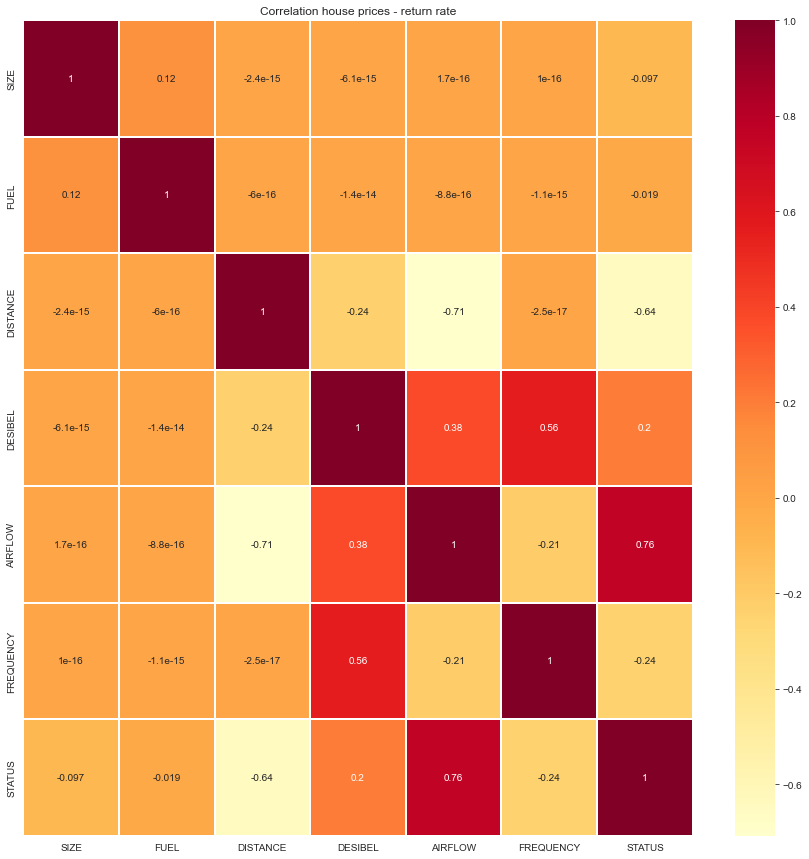

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlOrRd", linewidths=0.1, annot_kws={"fontsize":10})
plt.title("Correlation house prices - return rate");

#### From the last heatmap we can see that the data is pretty much correlated, and that's a very good thing for our models' predictions.
### Now is the time to split our data into training and testing sets so we can check our models' accuracies.

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
sc = StandardScaler() # Scaling our data so that any outliers don't effict our models' perfomance.


sc.fit(X_train)

X_train_st = sc.transform(X_train)
X_test_st = sc.transform(X_test)

## Let's start with the simplist model that we have in this report, the DecisionTreeClassifier:

In [14]:
DT = DecisionTreeClassifier().fit(X_train_st, y_train)
y_pred = DT.predict(X_test_st)
accuracy_score(y_test, y_pred)

0.9638865004299226

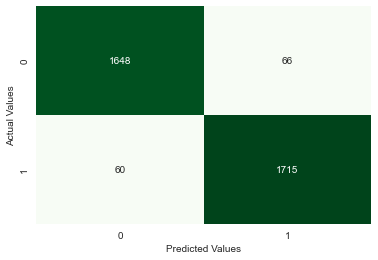

In [15]:
def cf(model, X_valid = X_test_st, y_valid_ = y_test):
    
    y_pred = model.predict(X_valid)
    confusionMatrix = confusion_matrix(y_valid_, y_pred)

    sns.heatmap(confusionMatrix, annot=True, fmt='g', cbar=False, cmap='Greens')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

cf(DT)

### DecisionTreeClassifier accuracy : 96%

## Second is the model that consists of 5 DecisionTreeClassifiers combined togither, the RandomForestClassifier:
#### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [16]:
RF = RandomForestClassifier(5,bootstrap=False).fit(X_train_st, y_train)
y_pred = RF.predict(X_test_st)
accuracy_score(y_test, y_pred)

0.9584408139868157

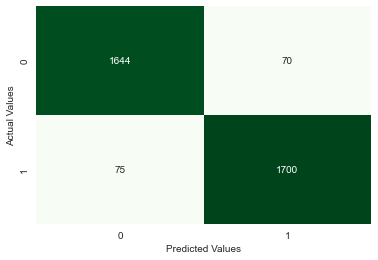

In [17]:
cf(RF)

### RandomForestClassifier accuracy : 96%

## And the last modle is the SVC:
#### A more complix supervised classifier than DecisionTreeClassofoer.

In [18]:
svc = SVC().fit(X_train_st, y_train)
y_pred = svc.predict(X_test_st)
accuracy_score(y_test, y_pred)

0.944110060189166

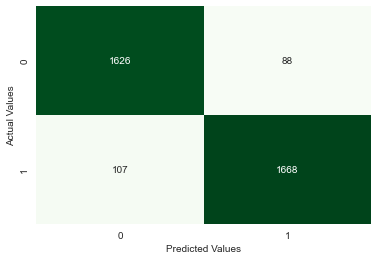

In [19]:
cf(svc)

### SVC accuracy: 94%

## Conclusion:
### Although the SVC model is more complex than the DecisionTree model, and the SVC data processing time was 8.4s and the DecisionTree data processing time was 0.2s (42 times), the SVC accuracy was 94% and the DecisionTree accuracy was 96%, plus when we built a RandomForest model that consists of 5 DecisionTrees. We found that the accuracy was 95.5%, which shows the ability of simple models (like DecisionTrees) and models that consist of several simple models combined (like RandomForests) to be more accurate and efficient than more complex models that have longer data processing time (like SVCs).